In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('winequality.csv')
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

<ipython-input-5-17c4014efccf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['residual sugar'])


<Axes: xlabel='residual sugar', ylabel='Density'>

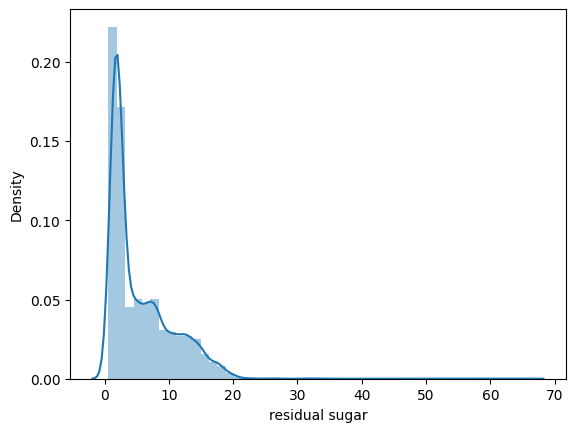

In [ ]:
sns.distplot(df['residual sugar'])

In [ ]:
df['residual sugar'].skew()

1.4349998392718966

<Axes: ylabel='residual sugar'>

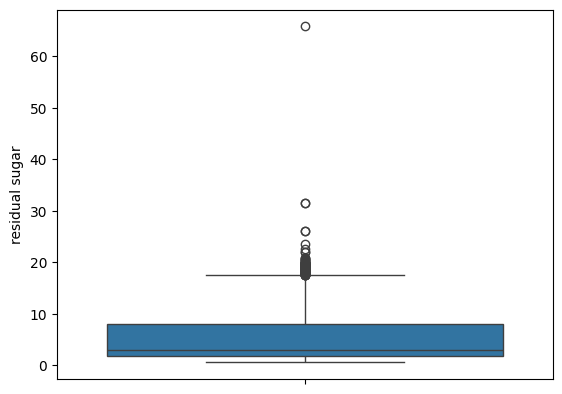

In [ ]:
sns.boxplot(df['residual sugar'])

In [ ]:
upper_limit = df['residual sugar'].mean() + 3*df['residual sugar'].std()
lower_limit = df['residual sugar'].mean() - 3*df['residual sugar'].std()

In [ ]:
new_df = df[(df['residual sugar']<upper_limit) & (df['residual sugar']>lower_limit)]

In [ ]:
len(outlier)

26

In [ ]:
print ("the length of older df:", len(df))
print ("the length of new df:", len(new_df))
print("the number of outlier:", len(df)-len(new_df))

the length of older df: 6497
the length of new df: 6469
the number of outlier: 28


<ipython-input-53-62a2de732922>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['residual sugar'])


<Axes: xlabel='residual sugar', ylabel='Density'>

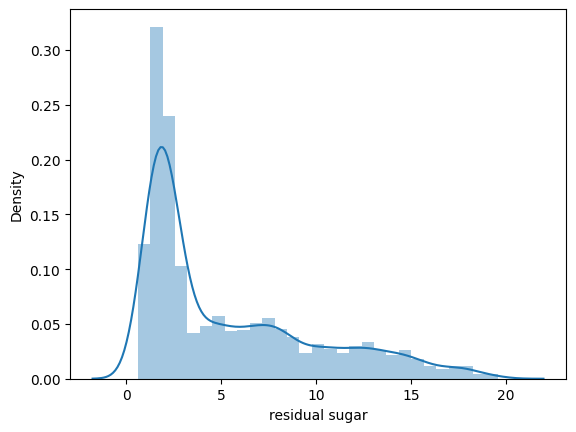

In [ ]:
sns.distplot(new_df['residual sugar'])

<Axes: ylabel='residual sugar'>

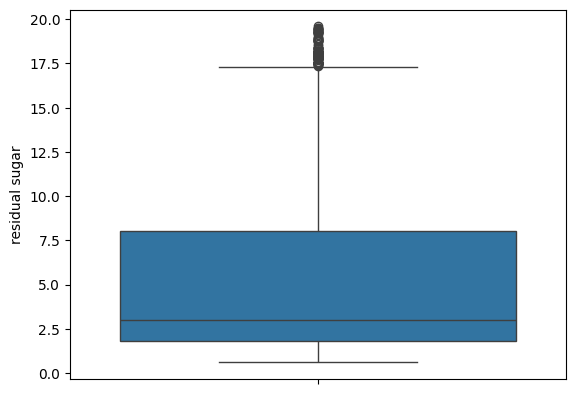

In [ ]:
sns.boxplot(new_df['residual sugar'])

Copping outlier


In [ ]:
new_df_c = df.copy()
new_df_c.loc[df['residual sugar']>upper_limit, 'residual sugar'] = upper_limit
new_df_c.loc[df['residual sugar']<lower_limit, 'residual sugar'] = lower_limit

<ipython-input-59-ebb9a59eb383>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_c['residual sugar'])


<Axes: ylabel='residual sugar'>

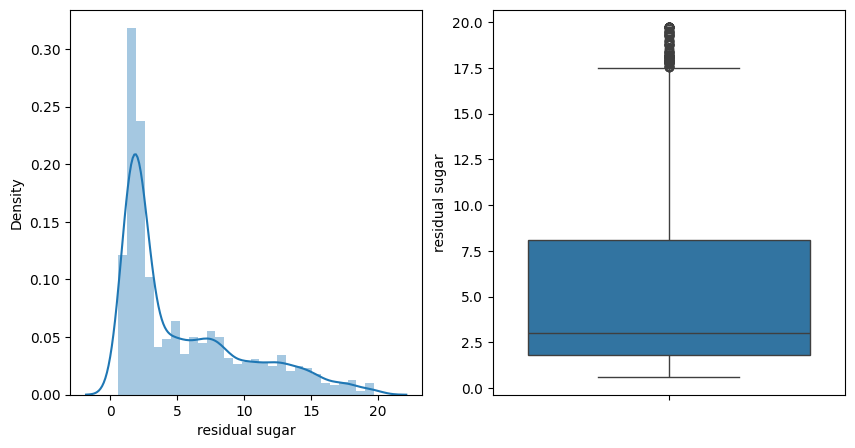

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(new_df_c['residual sugar'])
plt.subplot(1,2,2)
sns.boxplot(new_df_c['residual sugar'])

In [ ]:
print(df.shape)
print(new_df_c.shape)

(6497, 13)
(6497, 13)


Anther way of detecting outlier using z-score (Z-score = (x -mean) / std. deviation)
Z-score>threshold

In [ ]:
mean = df['residual sugar'].mean()
std = df['residual sugar'].std()
threshold = 3
outlier = []
for i in df['residual sugar']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [20.7, 20.7, 22.0, 22.0, 19.8, 20.8, 19.8, 23.5, 31.6, 31.6, 19.95, 19.95, 20.4, 65.8, 20.2, 20.2, 19.8, 19.8, 20.15, 19.95, 19.9, 26.05, 26.05, 20.8, 20.3, 22.6]


# IQR

In [ ]:
IQR = df['residual sugar'].quantile(0.75) - df['residual sugar'].quantile(0.25)
upper_limitI = df['residual sugar'].quantile(0.75) + 1.5*IQR
lower_limitI = df['residual sugar'].quantile(0.25) - 1.5*IQR
print(upper_limitI)
print(lower_limitI)

17.549999999999997
-7.6499999999999995


<ipython-input-64-7bd43b3b949b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['residual sugar'])


<Axes: ylabel='residual sugar'>

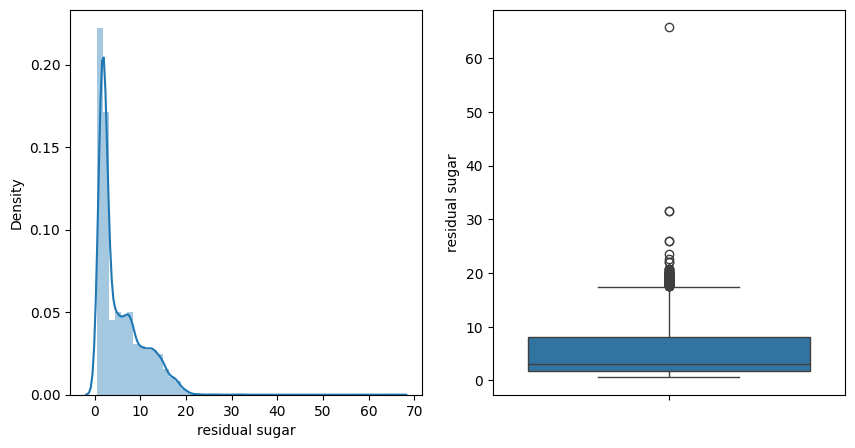

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['residual sugar'])
plt.subplot(1,2,2)
sns.boxplot(df['residual sugar'])

In [ ]:
# termining the data
new_dfI = df[(df['residual sugar']<upper_limitI) & (df['residual sugar']>lower_limitI)]

In [ ]:
print ("the length of older df:", len(df))
print ("the length of new df:", len(new_dfI))
print("the number of outlier:", len(df)-len(new_dfI))

the length of older df: 6497
the length of new df: 6377
the number of outlier: 120


<ipython-input-62-189c1a02a88d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dfI['residual sugar'])


<Axes: ylabel='residual sugar'>

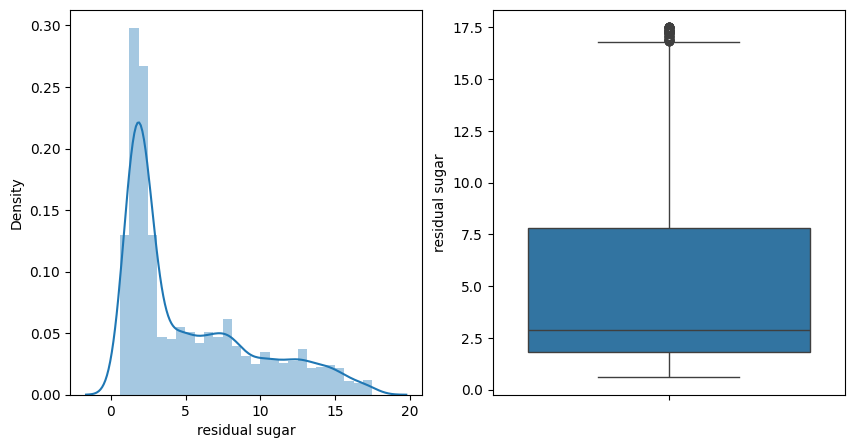

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(new_dfI['residual sugar'])
plt.subplot(1,2,2)
sns.boxplot(new_dfI['residual sugar'])

In [ ]:
new_df_c = df.copy()
new_df_c.loc[df['residual sugar']>upper_limitI, 'residual sugar'] = upper_limitI
new_df_c.loc[df['residual sugar']<lower_limitI, 'residual sugar'] = lower_limitI

<ipython-input-68-ebb9a59eb383>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_c['residual sugar'])


<Axes: ylabel='residual sugar'>

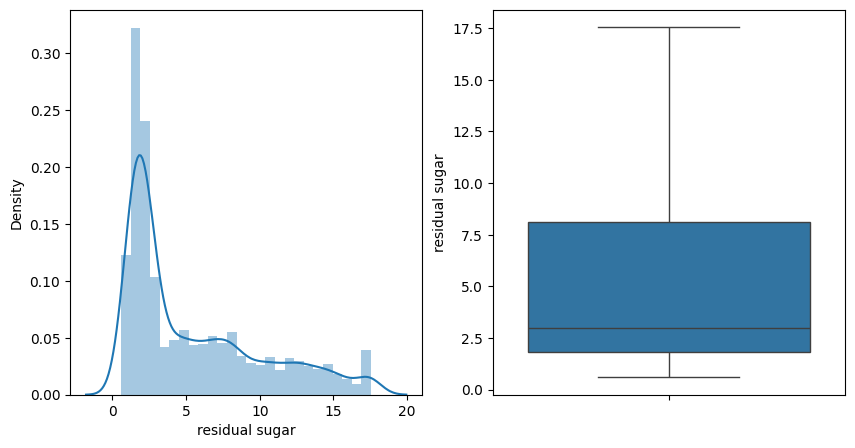

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(new_df_c['residual sugar'])
plt.subplot(1,2,2)
sns.boxplot(new_df_c['residual sugar'])